In [ ]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

# Data Acquisition: web scraping and API

<img src='https://imgs.xkcd.com/comics/api.png' width="200">

Source: [xqcd 1481](https://xkcd.com/1481/)

## Content

The goal of this walkthrough is to provide you with insights on exploratory data analysis throughout the use of a fun and interactive technique known as web scraping. During this laboratory, you will be provided with a broad overview of this technique as well as the major tools used in the process. You will also understand how data analysis can be conducted on real-time web data and hopefully see how this combination can be further applied to any other context. 

In essence, web scraping consists in harvesting the content of a web page in order to process its information for further use. In our example, web scraping is used as a fun way to extract data that we will analyze afterwards. In most cases, this technique comes hand in hand with data cleaning and data analysis. For further information on web scraping, click on the following [link](https://en.wikipedia.org/wiki/Web_scraping).

**Note :** You can also refer to this [tutorial](https://www.geeksforgeeks.org/python-web-scraping-tutorial/) at any time for additional informations on this topic from a course.

This notebook is organized as follows:
- [Web scrapping with Pandas](#Web-scrapping-with-Pandas)
    - [Your turn!](#Your-turn!)
- [Web scrapping libraries](#Web-scrapping-libraries)
- [Retrieving the data](#Retrieving-the-data)
- [Parsing the data](#Parsing-the-data)
    - [Finding elements by class](#Finding-elements-by-class)
    - [Finding specific elements](#Finding-specific-elements)
- [Your turn to scrap!](#Your-turn-to-scrap!)
- [API](#API)


## Web scrapping with Pandas

You are already familiar with the Pandas library and its DataFrame. Many different functions were presented to you for Dataframe manipulation. You should have noticed by now that this is a really usefull library when it comes to using tables. More over, one of the perks of using  Pandas is that you can directly scrap HTML tables from the web... Lets dive into it.

The main function we are going to be using is `read_html`, it allows you the directly put the data of webpage table into a DataFrame. For more information, just click on this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html). 

For example, imagine we wanted to demonstrate the importance of the research department for the future of a company, we would have at some point to provide evidences for such statement. To that end, lets get the [top 50 companies](https://en.wikipedia.org/wiki/List_of_companies_by_research_and_development_spending) with the highest research and development expenses in 2018.

In [ ]:
scraped_companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_companies_by_research_and_development_spending')
print("scraped tables " , len(scraped_companies))

The `read_html` function scraps any table from the webpage of interest as long as it has the right format.

In [ ]:
scraped_companies[1].head()

### Your turn!

[Manganese](https://en.wikipedia.org/wiki/Manganese) is one the mineral identified as critical for the energy transition, due to its applications for batteries and wind turbine for instance. 

- Extract the list of countries by manganese production ([link](https://en.wikipedia.org/wiki/List_of_countries_by_manganese_production))
- Use `loc` to extract the manganese production of Gabon

In [ ]:
# Write your code here...

# We extract with read_html, which returns a list of tables. We thus use [0] to extract the first table
production_Mn = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_manganese_production')[0]

# We extract the production of Gabon:
production_Mn_gabon = production_Mn.loc[production_Mn['Country/Region'] == 'Gabon', 'Manganese production (tonnes)']

# We print the result using a f-string:
print(f'The manganese production of Gabon is: {int(production_Mn_gabon)} tonnes')

## Web scrapping libraries

In order to get the data from the Web with Python, we will require during the course of this lab to use the following two essential libraries:

*  Requests (HTTP): retrieves the web pages (html) to parse.
*  Beautiful Soup (HTML Parsing): parses the html.

If you are working on this notebook in Colab or using JupyterLab, no specific environmental installation should be needed to work on this lab. We can directly import the needed libraries (see top of the notebook). Otherwise just install the libraries in your Anaconda/Python environment.

## Retrieving the data

In order to get started with web scraping we must first make a [request](https://requests.readthedocs.io/en/master/user/quickstart/). In simple words, we will ask the server hosting the webpage we are interested in its content.

Let's try it! We can use the ``requests.get`` method to retrieve information from a specified URL. 

We will parse through the life of [Muḥammad ibn Mūsā al-Khwārizmī](https://en.wikipedia.org/wiki/Muhammad_ibn_Musa_al-Khwarizmi). Al-Khwarizmi was a Persian polymath who is described as the father of algebra, the term originating from the title of his book *al-jabr*, meaning "completion" or "rejoining". From his name is also derived the word *algorithm*. An algorithm is a finite sequence of instructions to solve a problem - in other words it is a recipe. All the Machine Learning techniques you will see in this course are algorithms!

In [ ]:
# Make the request
r = requests.get('https://en.wikipedia.org/wiki/Muhammad_ibn_Musa_al-Khwarizmi')

We obtain a response object. We can check the status of our request using the library method ``status_code``. You can find more on the HTTP status code on this [link](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). A code of **200** means the HTTP request was successfully completed. The response header display metadata about the request itself:

In [ ]:
# Status Code
print('Response status code: {0}\n'.format(r.status_code))
print(r.headers)

**Note :** Requesting data from a website is not always straightforward. There can be some restrictions made by the server hosting the page regarding the request origin, content or number. As such, you should always pay attention to the request policy of a website before scraping it. The standards used by websites to indicate which portions can be scraped is called [robots.txt](https://en.wikipedia.org/wiki/Robots.txt). In the case of Wikipedia, here it is:  [link](https://en.wikipedia.org/robots.txt).

Now, lets see the raw content of our request. The body of the response here will be in HTML since we are asking for a webpage. Different format such as  JSON or XML could also be imagined for web services.

In [ ]:
print(r.text[:3000])

## Parsing the data

Now as you can see, the HTTP response's body as it is, is hardly usable. Therefore, we rely on BeautifulSoup to parse the content for further processing. Thus, we specify that we need the html.parser. For more information, you can click [here.](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser)

BeautifulSoup, thanks to parsing the content, will allow us to conduct a series of different operations and commands that you will be discovering in the remaining part of this lab. This library can be very powerful and complete when it comes to parsing and manipulations. This overview is not meant to display all possible features offered by BeautifulSoup.

Before getting out any information from the HTML page, it is best to understand the structure of the page. We can do so by right-clicking on the page and select "Inspect", which will open the Developer Tools:

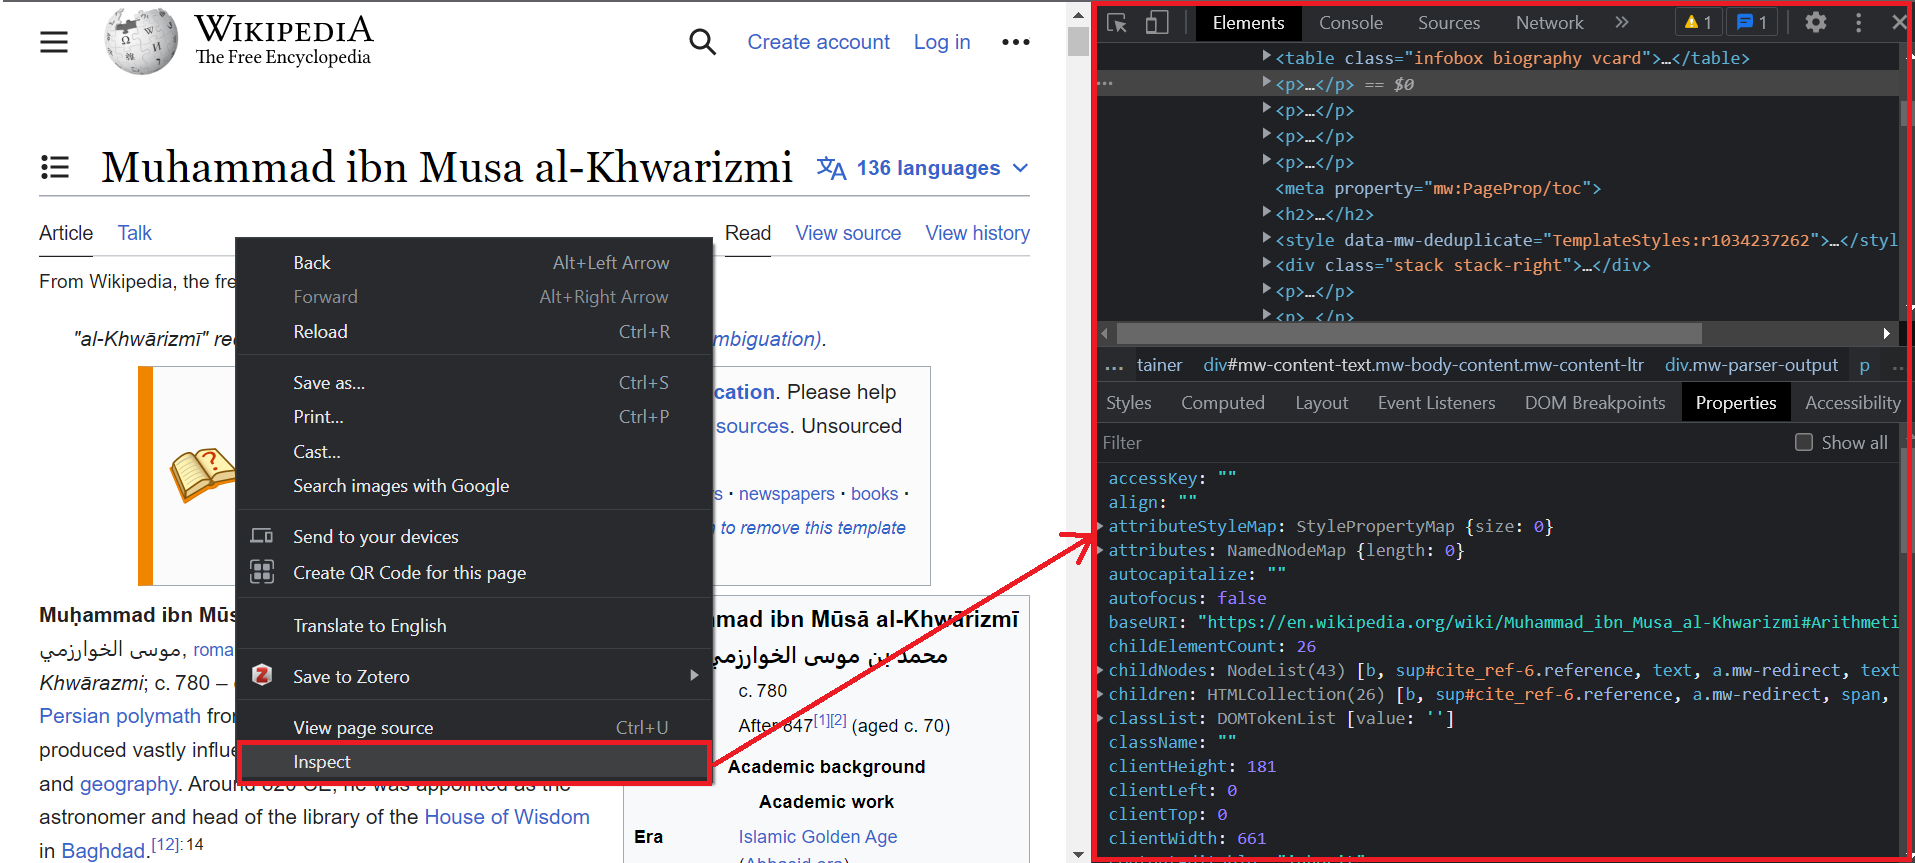


Ok, let's start to parse this raw HTML code. We create a BeautifulSoup object:

In [ ]:
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')

We can now extract information from the page. Let's first get the title:

In [ ]:
soup.title

Yet, this is stil in HTML format, therefore using the ``.string`` method allows for a more conventional layout.

In [ ]:
soup.title.string

To go further with this laboratory and with Data retrieval after parsing, some HTML notions are required. In essence, you should get acquainted with concepts like **HTML tags**. Several functions and manipulations allowed by BeautifulSoup rely on the different tags (headers, divisions, paragraphs, classes, ids etc..) to retrieve the data they contain. You can find more on HTML tags [here](https://www.w3schools.com/html/html_elements.asp).

**Important** : All the manipulations that are performed bellow rely on a study of the HTML body of the response. As it is specific to the website, it is fundamental to understand how to retrieve the information and how to get it from.  

We will extensively use ``soup.find`` and ``soup.find_all`` to navigate the data structure, please do not hesitate to refer to the corresponding [documentation](https://https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for more information.

### Finding elements by class

#### Retrieving links

The "a" tag is generally used for website links embedding (combined with ``href``). With `find_all`, we can retrieve all the links:

In [ ]:
links = soup.find_all('a')
print(f'The webpage contains {len(links)} links.')

We obtain a list of all the links in the webpage. Let's check some of them:

In [ ]:
print(links[0])
print(links[74])
print(links[229])

As we can see, we have different types of links, i.e., different `class`. For instance, "my-jump-link" corresponds to cross-reference links, "interlanguage-link-target" redirects to the same article in another language, and "mw-redirect" to other Wikipedia pages in English.

Let's extract all the links correspond to the class "mw-redirect". We can do so by adding a second argument to `find_all`:

In [ ]:
links_Wiki_redirect = soup.find_all('a', class_="mw-redirect")
print(links_Wiki_redirect[:3])

We can know access the URL of the links, which is accessible with the property `href`. We can use the method `get` to extract these properties.

In [ ]:
print(links_Wiki_redirect[1])
print(links_Wiki_redirect[1].get('href'))

Notice the format: 'href' only contains the end of the URL. We thus need to add the beginning to obtain proper links:

In [ ]:
url_wiki = 'https://en.wikipedia.org'
print(url_wiki + links_Wiki_redirect[1].get('href'))

Ok! Let's do it one more time. This time we'll print all the links corresponding to the images in the article:

In [ ]:
image_links = soup.find_all('a', class_="image")
for l in image_links:
    print(url_wiki + l.get('href'))

#### Retrieving text

Another common operation is to extract text from a website. If we inspect the page, we notice that the text is under the 'p' tag. We proceed as before, finding all 'p' tags in the page.

In [ ]:
text = soup.find_all('p')
text[1]

As we can see, the format we get is not yet readable. For instance, we have various references in our paragraph that are displayed with HTML format. To extract the actual text, we can use the `text` method:

In [ ]:
for t in text[0:5]:
    print(t.text)

Not bad! We probably need more cleaning but have achieved a readable version!

### Finding specific elements

Above we have extracted all elements with a given tag or class. What if we want a specific element? We can generally use the `id`.

For instance, let's try to extract the table of content, using `find`. By inspecting the page, we observe that the table of content falls under the `div` tag while its `id` is "vector-toc".

In [ ]:
content = soup.find('div', id="vector-toc")

As always, we need a little more processing before obtaining a readable result. The text of the table of content falls under the `class` "vector-toc-text":

In [ ]:
toc = content.find_all('div', class_='vector-toc-text')

for l in toc:
    print(l.text)

## Your turn to scrap!


Now it's your turn to practice. We will use the [Stanford Encyclopedia of Philosophy](https://plato.stanford.edu/index.html) (SEP), an online encyclopedia of philosophy and related fields. We will use the [Biodiversity](https://plato.stanford.edu/entries/biodiversity/) entry.

Extract the Biodiversity article of the SEP, and print the status code of the response:

In [ ]:
# Write your code here...

r_biodiversity = requests.get('https://plato.stanford.edu/entries/biodiversity/')
print('Response status code: {0}\n'.format(r_biodiversity.status_code))

Parse the text, and print the title of the article.

In [ ]:
# Write your code here...

biodiversity_body = r_biodiversity.text
biodiversity_soup = BeautifulSoup(biodiversity_body, 'html.parser')

print(biodiversity_soup.title.string)

Print the text of the article.

In [ ]:
# Write your code here...

content_biodiversity = biodiversity_soup.find_all('p')

for t in content_biodiversity:
    print(t.text)

Print the url of the Figure A:

In [ ]:
# Write your code here...

# We notice that Figure A has the idea 'figA' and the tag 'div'
image_biodiversity = biodiversity_soup.find('div', id='figA')

# The link is under 'src', but this 'src' belongs to a children tag called 'img'.
# We extract the 'img' tag with find
# We get the 'src' property with get
image_src = image_biodiversity.find('img').get('src')

# We got only the end of the url, we thus need to join this with the beginning of the url:
biodiversity_url = 'https://plato.stanford.edu/entries/biodiversity/'

print(biodiversity_url + image_src)

Print a list of the references (i.e. the bibliography):

In [ ]:
# Write your code here...

# We first extract the full bibliography html code, which has the tag 'div' and the property id 'bibliography'
bibliography_biodiversity = biodiversity_soup.find('div', id='bibliography')

# The references are under the 'li' tag. We extract (find) all of them
references_biodiversity = bibliography_biodiversity.find_all('li')

# We finally print the text with a for loop:
for t in references_biodiversity:
    print(t.text  + '\n')

## API

An [API](https://en.wikipedia.org/wiki/API), or Application Programming Interface, is a server that we can use to retrieve and send data to using code. When using an API, we make a request to a remote web server for data, and it responds to our requests. To do so, we use the same library as before, namely `requests`. 

To ensure we make a successful request, it is crucial to **consult the API documentation**. 

**Note :** You can also refer to this [tutorial](https://www.dataquest.io/blog/python-api-tutorial/) at any time for additional information on this topic.

In this lab, we will extract weather data from [OpenWeather](https://openweathermap.org/). You will need to create a free account to obtain an API key. 

Once you have an account, check the API documentation and request the current weather data for the city of your choice using `requests.get`:

In [ ]:
# Your code here...

# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
lat = 45.9237
lon = 6.8694
key = 'YOUR_KEY'  # Put your key here

url_request = 'https://api.openweathermap.org/data/2.5/weather?lat='+str(lat)+'&lon='+str(lon)+'&appid='+key

weather_city = requests.get(url_request)

Check that the request was successful using `status_code`.

In [ ]:
# You code here...

print(weather_city.status_code)

We can now look at the data. The primary format in which data is passed back and forth to APIs is [JSON](https://www.json.org/json-en.html) (JavaScript Object Notation). 

We can check the data obtained using the `json()` method:

In [ ]:
print(weather_city.json())

We notice that the JSON output we received from the API looked like it contained Python dictionaries, lists, strings and integers. You can think of JSON as being a combination of these objects represented as strings. To work with JSON data, we can use the `json` package ([Documentation](https://docs.python.org/3/library/json.html), [Tutorial](https://www.w3schools.com/python/python_json.asp)).



Explore the weather in your city. Print the temperature, wind speed, rain and other indicators of your choice.

In [ ]:
# Your code here

data_city = weather_city.json()
city = data_city['name']
temp_city = data_city['main']['temp']
wind_city = data_city['wind']['speed']

print(f'In {city}, the temperature is {temp_city} Kelvin and the wind speed {wind_city} m/s.')

There are many other cool API out there, e.g., [NASA APIs](https://api.nasa.gov/), Google Search API [SerApi](https://serpapi.com/), Google [Earth Engine](https://earthengine.google.com/) for satellite data, [Agromonitoring](https://agromonitoring.com/) which provides satellite and weather data for agriculture, [OMDb API](https://www.omdbapi.com/) containing movie information, etc. Check them out!